In [1]:
%matplotlib inline

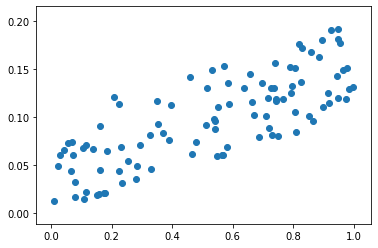

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Random 100 points by numpy
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.1*np.random.rand(100).astype(np.float32)

# plot data
plt.scatter(x_data, y_data)
plt.show()

0 [-0.00494822] [0.04696195]


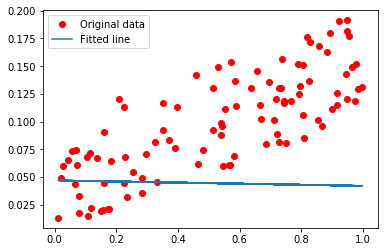

50 [0.09354819] [0.04957858]


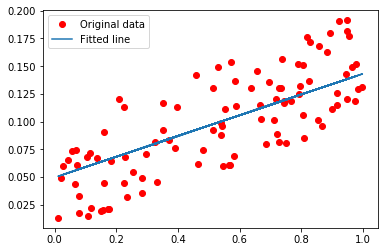

100 [0.11057071] [0.03981883]


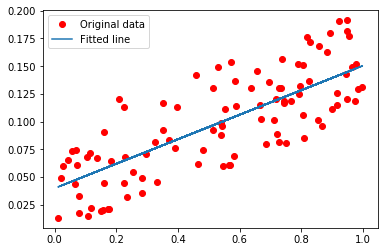

150 [0.11454014] [0.03754299]


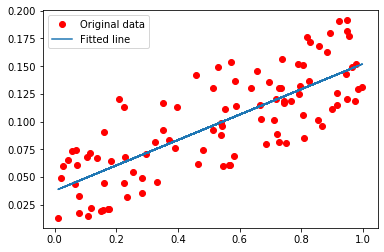

200 [0.11546575] [0.03701229]


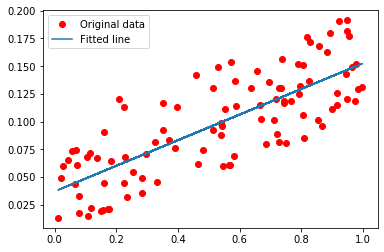

250 [0.1156816] [0.03688854]


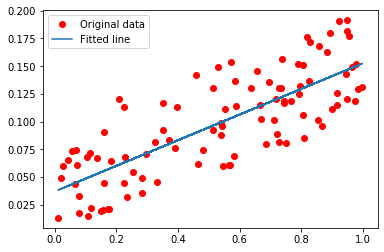

300 [0.11573194] [0.03685968]


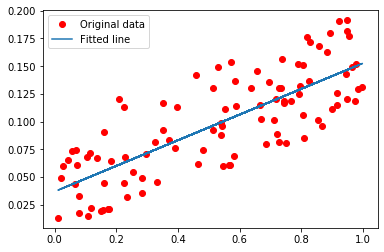

350 [0.11574368] [0.03685295]


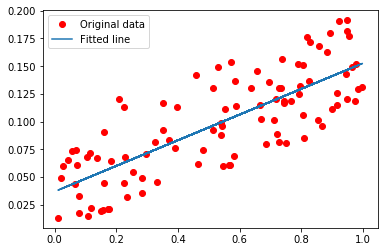

400 [0.11574641] [0.03685138]


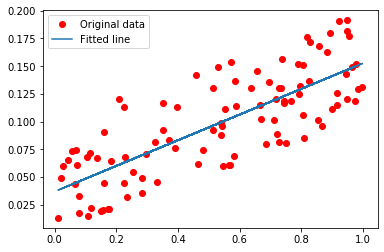

450 [0.11574703] [0.03685103]


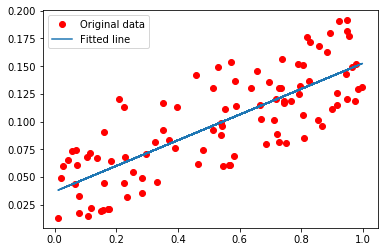

In [9]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.03, but TensorFlow will
# figure that out for us.) 
# Use tensorflow to find weighting of fitting

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(500):
    sess.run(train)
    if step % 50 == 0:
        print(step, sess.run(W), sess.run(b))
        plt.plot(x_data, y_data, 'ro', label='Original data')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()

# Learns best fit is W: [0.1], b: [0.03]